# TITANIC EDA

In [1]:
# importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore")


In [2]:
df_train=pd.read_csv("train.csv")

In [3]:
df_test=pd.read_csv("train.csv")

# EXPLORATORY DATA ANALYSIS

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.shape

(891, 12)

In [6]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Visualizing the missing data using a heatmap

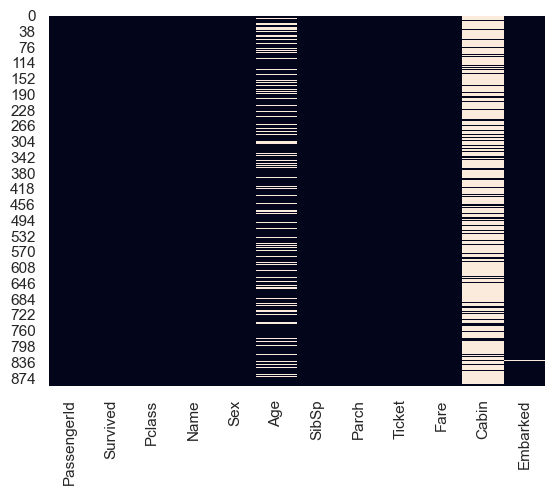

In [8]:
sns.heatmap(df_train.isnull(), cbar=False)
plt.show()

Handle missing values in 'Age' and 'Fare' column by filling with median

In [9]:
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
df_train['Fare'].fillna(df_train['Fare'].median(), inplace=True)

Handle missing values in 'Embarked' column by filling with mode

In [10]:
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)

Drop irrelavent colums

In [11]:
df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

Exploring the variables

Count the number of survivors

In [12]:
print(df_train['Survived'].value_counts())

0    549
1    342
Name: Survived, dtype: int64


Distribution of age

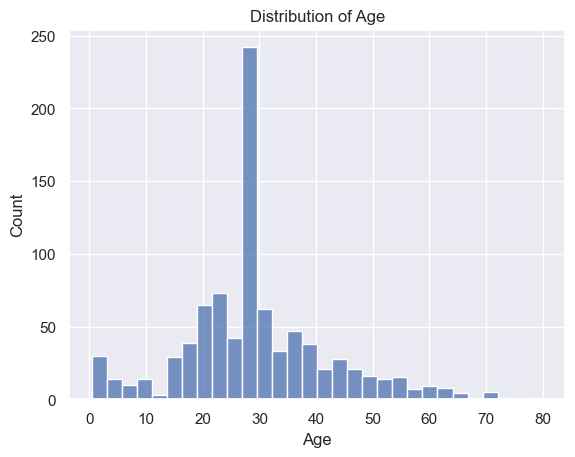

In [13]:
sns.histplot(df_train['Age'].dropna(), kde=False, bins=30)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

Survival rate based on gender

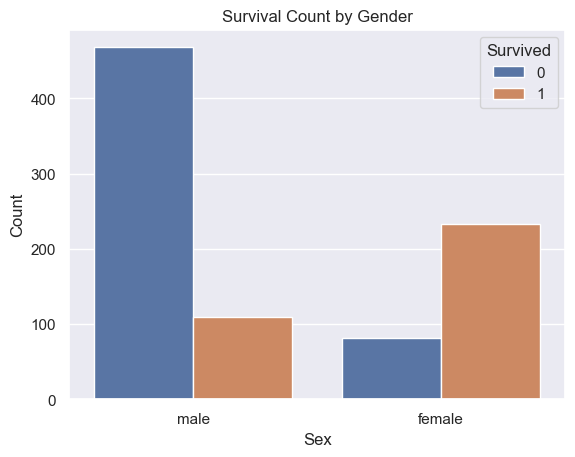

In [14]:
sns.countplot(data=df_train, x='Sex', hue='Survived')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Survival Count by Gender')
plt.show()

Survival rate based on passenger class

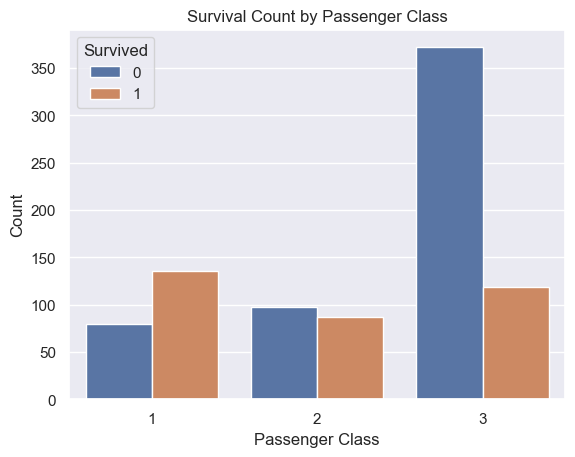

In [15]:
sns.countplot(data=df_train, x='Pclass', hue='Survived')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Survival Count by Passenger Class')
plt.show()

Barplot of Survival by Gender


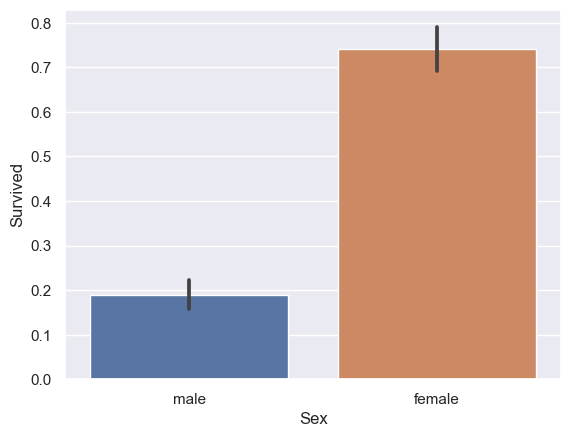

In [16]:
sns.barplot(x='Sex', y='Survived', data=df_train)
plt.show()

Distribution of fare

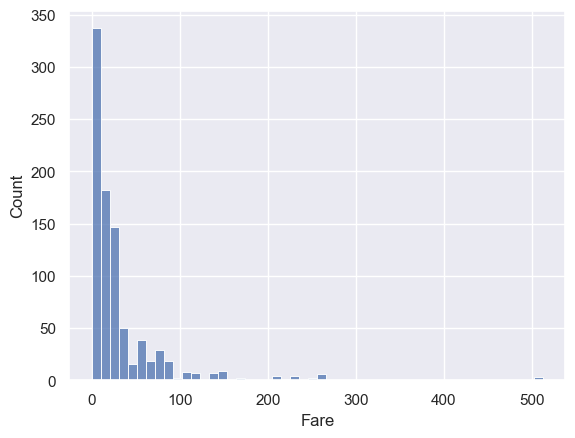

In [17]:
sns.histplot(df_train['Fare'], kde=False, bins=50)
plt.xlabel('Fare')
plt.show()

Visualizing the data

Creating a correlation matrix

In [18]:
corr_matrix = df_train.corr(method='pearson', min_periods=1, numeric_only=True)
corr_matrix

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


Visualizing the correlation matrix using a heatmap

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Visualizing the final dataset


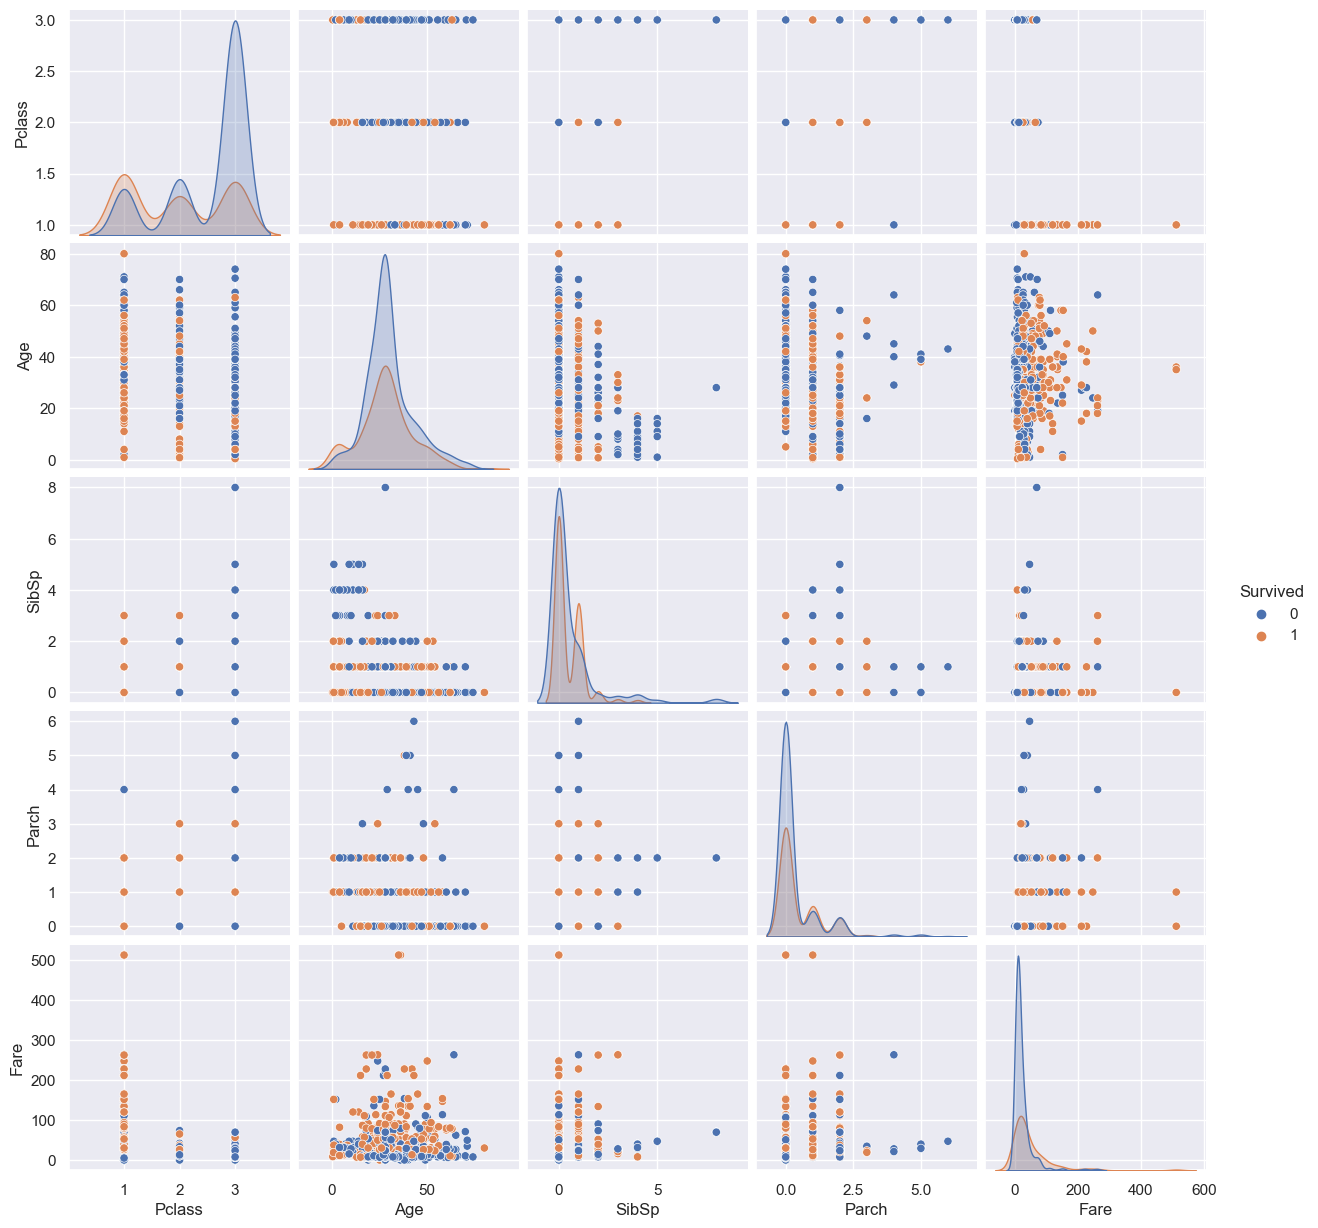

In [19]:
sns.pairplot(df_train, hue='Survived')
plt.show()